In [1234]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Interpolasi Menggunakan Metode Vandermonde

## Mencari Interpolasi Polinomial Orde 9 `p_9(t)`

In [1235]:
t_values = np.array([0, 60, 120, 180, 240, 300, 360, 420, 480, 540])
x_values = np.array([0, 2.73, 2.70, 2.62, 2.68, 2.68, 2.64, 2.72, 2.69, 2.55])
y_values = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])

In [1236]:
def basis_A(t, i):
    return t ** i

def basis_B(t, i):
    return (t - 60) ** i

def basis_C(t, i):
    return (t - 480) ** i

def basis_D(t, i):
    return ((t - 480) / 30) ** i

In [1237]:
def evaluate_polynomial(coefficients, phi_values):
    results = []
    for p in phi_values:
        result = 0
        for c in reversed(coefficients):
            result = result * p + c
        results.append(result)
    return np.array(results)

In [1238]:
def create_matrix(t_values, basis_function):
    n = len(t_values)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = basis_function(t_values[i], j)
    return A

In [1239]:
def lu_factorization(A):
    n = A.shape[0]
    L = np.zeros_like(A)
    U = np.zeros_like(A)
    
    for i in range(n):
        for j in range(i, n):
            U[i, j] = A[i, j] - sum(L[i, k] * U[k, j] for k in range(i))
        
        for j in range(i, n):
            if i == j:
                L[j, i] = 1
            else:
                L[j, i] = (A[j, i] - sum(L[j, k] * U[k, i] for k in range(i))) / U[i, i]
    
    return L, U

def forward_substitution(L, b):
    n = len(b)
    x = np.zeros_like(b)
    for i in range(n):
        x[i] = (b[i] - sum(L[i, j] * x[j] for j in range(i))) / L[i, i]
    return x

def backward_substitution(U, b):
    n = len(b)
    x = np.zeros_like(b)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - sum(U[i, j] * x[j] for j in range(i + 1, n))) / U[i, i]
    return x

In [1240]:
selected_basis = basis_D

In [1241]:
A = create_matrix(t_values, selected_basis)

L, U = lu_factorization(A)

c9x = np.linalg.solve(A, x_values)
c9y = np.linalg.solve(A, y_values)

In [1242]:
t_eval    = np.linspace(0, 540, 541)
phi9_init  = selected_basis(t_eval, 1)

x9_eval = evaluate_polynomial(c9x, phi9_init)
y9_eval = evaluate_polynomial(c9y, phi9_init)

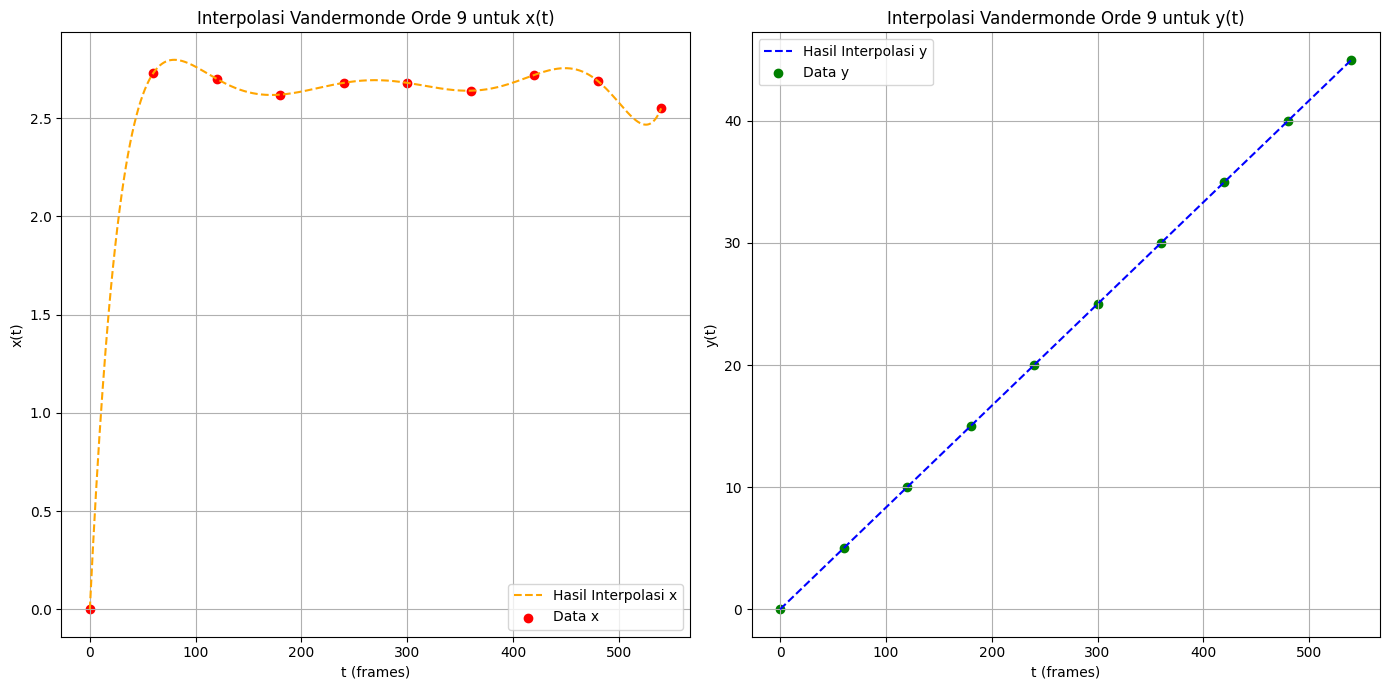

In [1243]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(t_eval, x9_eval, '--', color='orange', label="Hasil Interpolasi x")
plt.scatter(t_values, x_values, color='red', label="Data x")
plt.title("Interpolasi Vandermonde Orde 9 untuk x(t)")
plt.xlabel("t (frames)")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_eval, y9_eval, '--', color='blue', label="Hasil Interpolasi y")
plt.scatter(t_values, y_values, color='green', label="Data y")
plt.title("Interpolasi Vandermonde Orde 9 untuk y(t)")
plt.xlabel("t (frames)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Mencari Interpolasi Polinomial Orde 10 `p_10(t)`

In [1244]:
t_new = 600
x_new = 2.336957
y_new = 50

In [1245]:
t_extended = np.append(t_values, t_new)
x_extended = np.append(x_values, x_new)
y_extended = np.append(y_values, y_new)

In [1246]:
phi10_init = selected_basis(t_new, 1)           # Inisialisasi Phi_1(t = 600) untuk Horner's Method pada Polinomial Orde 9
phi10      = selected_basis(t_new, 10)          # Nilai Phi_10(t = 600)

c10x = np.append(c9x, ((x_new - evaluate_polynomial(c9x, [phi10_init])) / phi10)[0])
c10y = np.append(c9y, ((y_new - evaluate_polynomial(c9y, [phi10_init])) / phi10)[0])

print(f"Nilai c10_x: {c10x[-1]}")
print(f"Nilai c10_y: {c10y[-1]}")

Nilai c10_x: -6.554644584652959e-06
Nilai c10_y: -8.402566836762659e-19


In [1247]:
t_eval   = np.linspace(0, 540, 541)
phi10_init = selected_basis(t_eval, 1)

x10_eval = evaluate_polynomial(c10x, phi10_init)
y10_eval = evaluate_polynomial(c10y, phi10_init)

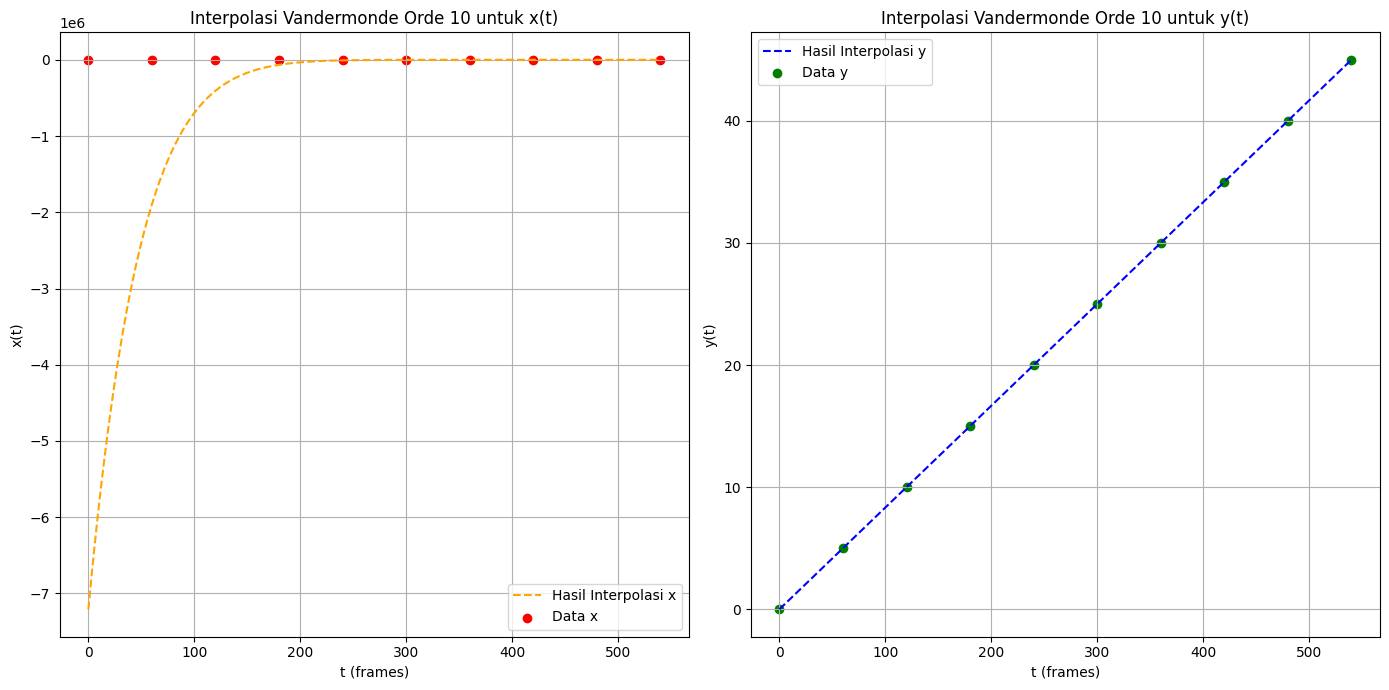

In [1248]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(t_eval, x10_eval, '--', color='orange', label="Hasil Interpolasi x")
plt.scatter(t_values, x_values, color='red', label="Data x")
plt.title("Interpolasi Vandermonde Orde 10 untuk x(t)")
plt.xlabel("t (frames)")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_eval, y10_eval, '--', color='blue', label="Hasil Interpolasi y")
plt.scatter(t_values, y_values, color='green', label="Data y")
plt.title("Interpolasi Vandermonde Orde 10 untuk y(t)")
plt.xlabel("t (frames)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Visualisasi `p_9(t)` dan `p_10(t)`

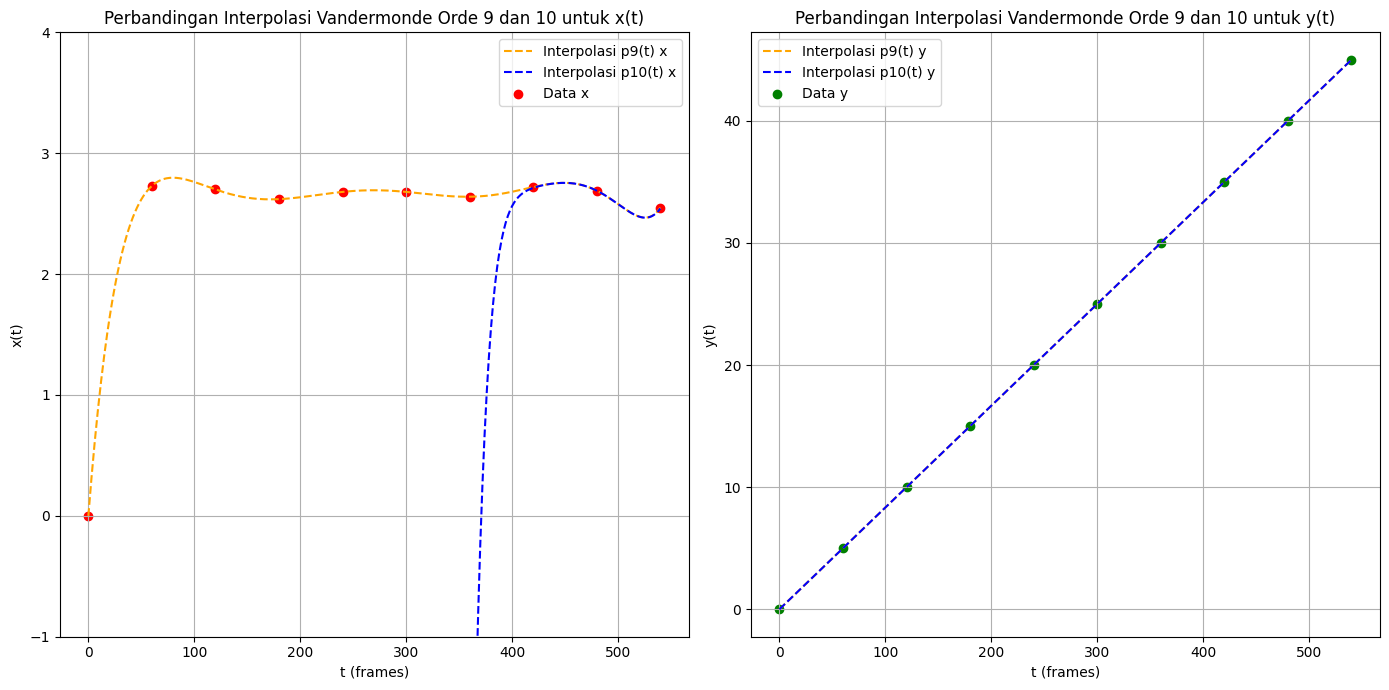

In [1249]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(t_eval, x9_eval, '--', color='orange', label="Interpolasi p9(t) x")
plt.plot(t_eval, x10_eval, '--', color='blue', label="Interpolasi p10(t) x")
plt.scatter(t_values, x_values, color='red', label="Data x")
plt.title("Perbandingan Interpolasi Vandermonde Orde 9 dan 10 untuk x(t)")
plt.xlabel("t (frames)")
plt.ylabel("x(t)")
plt.legend()
plt.ylim(-1, 4)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_eval, y9_eval, '--', color='orange', label="Interpolasi p9(t) y")
plt.plot(t_eval, y10_eval, '--', color='blue', label="Interpolasi p10(t) y")
plt.scatter(t_values, y_values, color='green', label="Data y")
plt.title("Perbandingan Interpolasi Vandermonde Orde 9 dan 10 untuk y(t)")
plt.xlabel("t (frames)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## *Export* Hasil Evaluasi `p_9(t)` dan `p_10(t)` ke dalam File `csv`

In [1250]:
# Export Hasil Evaluasi Interpolasi x p_9(t) ke CSV
with open("Evaluasi/vandermonde_x.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["t", "x(t)"])
    for i in range(len(t_eval)):
        writer.writerow([t_eval[i], x9_eval[i]])

# Export Hasil Evaluasi Interpolasi y p_9(t) ke CSV
with open("Evaluasi/vandermonde_y.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["t", "y(t)"])
    for i in range(len(t_eval)):
        writer.writerow([t_eval[i], y9_eval[i]])